<a href="https://colab.research.google.com/github/zombig816/Numerical-methods/blob/main/num_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

99


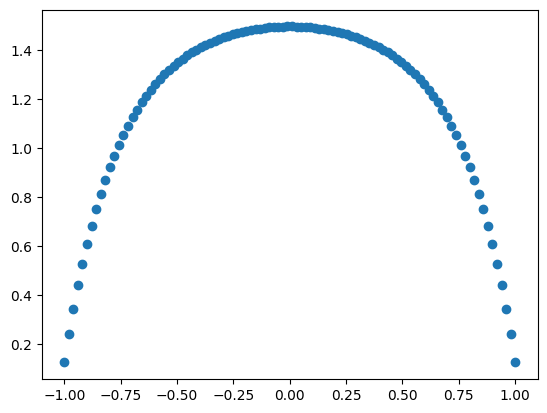

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, eps):
  return ((1/eps) + np.pi**2) + np.cos(np.pi * x)

def q(x, eps):
  return 1/eps

def u(x, eps):
  return (np.cos(np.pi * x)
   + np.exp((x - 1.0)/(eps**0.5))
    + np.exp(-(x + 1.0)/(eps**0.5)))

def progonka(a, b, N, eps, f, q, u):
  h = (b - a) / N
  ua = u(a, eps)
  ub = u(b, eps)
  x = np.linspace(a, b, N)
  A = - (1/(h**2))
  C = - (1/(h**2))
  B = (2/(h**2)) + q(x, eps)
  F = (f(x, eps))

  alpha = [(-C / B)]
  betta = [(F[0]/B)]

  for i in range(1, N-1):
    alpha.append( -(C/(B + alpha[i-1]*A)) )
    betta.append( (F[i] - A*betta[i-1]) / (B + A*alpha[i-1]) )

  y = [(F[-1] - A*betta[-1]) / (B + A*alpha[-1])]
  print(len(alpha))
  for i in range(N-2, -1, -1):
    y.append(alpha[i] * y[N-2-i] + betta[i])

  return x, y

a = -1
b = 1
eps = 0.05
N = 100

x, y = progonka(a, b, N, eps, f, q, u)

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()


